# Import Dependencies

In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Request Library and API key 
import requests 
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Create Random Latitudes and Longitudes to Get Cities 

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Determine Cities using Citipy 

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
# Citipy searches the nearest city to the coordinates, with a minimum population of 500. 
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count >= 625
print(f"{len(cities)} unique cities identified from 1,500 randomly generated coordinates.")

774 unique cities identified from 1,500 randomly generated coordinates.


# Retrieve Data Using Cities Generated 

In [15]:
# Build Basic URL for API call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Initialize Empty List and Counters for Data Retrieval 

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        # Gets reset to 1 once 50 cities have been processed 
        record_count = 1
        # Prevents time-out errors since OpenWeatherMap API only allows 50 retrievals per min for Free 
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count. Enumerates the total number of cities processed. 
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iquitos
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | tongliao
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | deh rawud
City not found. Skipping...
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | lumphat
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | yirol
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | bengk

Processing Record 40 of Set 4 | black river
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | kozhva
Processing Record 43 of Set 4 | waipawa
Processing Record 44 of Set 4 | hefei
Processing Record 45 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 46 of Set 4 | ust-maya
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | lakes entrance
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | tashigang
Processing Record 1 of Set 5 | sobolevo
Processing Record 2 of Set 5 | yumen
Processing Record 3 of Set 5 | saint-hyacinthe
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | carauari
Processing Record 6 of Set 5 | kununurra
Processing Record 7 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | kontagora
Processing Record 10 of Set 5 | tres arroyos
Processing Record 11 of Set 5 | anadyr
Processing R

Processing Record 26 of Set 8 | victor harbor
Processing Record 27 of Set 8 | blackfoot
Processing Record 28 of Set 8 | natchez
Processing Record 29 of Set 8 | ahmadpur east
Processing Record 30 of Set 8 | stornoway
Processing Record 31 of Set 8 | asilah
Processing Record 32 of Set 8 | novo aripuana
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | karlstad
Processing Record 35 of Set 8 | kouroussa
Processing Record 36 of Set 8 | talcher
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | daru
Processing Record 39 of Set 8 | bagan
Processing Record 40 of Set 8 | chifeng
Processing Record 41 of Set 8 | kurilsk
Processing Record 42 of Set 8 | santa helena de goias
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | wamba
Processing Record 45 of Set 8 | sahuaripa
Processing Record 46 of Set 8 | acapulco
Processing Record 47 of Set 8 | christchurch
Processing Record 48 of Set 8 | puro
Processing Record 49 of Set 8 | yinchuan
P

Processing Record 10 of Set 12 | yar-sale
Processing Record 11 of Set 12 | terrace
Processing Record 12 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 12 | necochea
Processing Record 14 of Set 12 | celestun
Processing Record 15 of Set 12 | kapoeta
Processing Record 16 of Set 12 | qandala
Processing Record 17 of Set 12 | rossosh
Processing Record 18 of Set 12 | aborlan
Processing Record 19 of Set 12 | partapur
Processing Record 20 of Set 12 | salto
Processing Record 21 of Set 12 | tidore
City not found. Skipping...
Processing Record 22 of Set 12 | sibiti
Processing Record 23 of Set 12 | praya
Processing Record 24 of Set 12 | ust-kuyga
Processing Record 25 of Set 12 | midland
Processing Record 26 of Set 12 | pacific grove
Processing Record 27 of Set 12 | niamtougou
Processing Record 28 of Set 12 | boguchany
Processing Record 29 of Set 12 | amol
Processing Record 30 of Set 12 | keshan
City not found. Skipping...
Processing Record 31 of Set 12 | asfi
Proc

Processing Record 49 of Set 15 | valparaiso
Processing Record 50 of Set 15 | karasburg
Processing Record 1 of Set 16 | boa vista
Processing Record 2 of Set 16 | sterling
Processing Record 3 of Set 16 | santa lucia
Processing Record 4 of Set 16 | male
Processing Record 5 of Set 16 | linchuan
City not found. Skipping...
Processing Record 6 of Set 16 | boddam
Processing Record 7 of Set 16 | mergui
City not found. Skipping...
Processing Record 8 of Set 16 | villarrica
Processing Record 9 of Set 16 | xique-xique
Processing Record 10 of Set 16 | freeport
Processing Record 11 of Set 16 | ambon
Processing Record 12 of Set 16 | marseille
Processing Record 13 of Set 16 | tromso
Processing Record 14 of Set 16 | karpogory
Processing Record 15 of Set 16 | ulladulla
Processing Record 16 of Set 16 | kiama
Processing Record 17 of Set 16 | murwara
Processing Record 18 of Set 16 | wattegama
Processing Record 19 of Set 16 | velsk
Processing Record 20 of Set 16 | warqla
City not found. Skipping...
Process

In [17]:
# Check the length of the cities_data dictionary 
print(f"Weather data for {len(city_data)} cities were retrieved from OpenWeatherMap API")

Weather data for 706 cities were retrieved from OpenWeatherMap API


# Convert the data into a Dataframe 

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
raw_city_data_df = pd.DataFrame(city_data)
raw_city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iquitos,-3.7481,-73.2472,86.04,79,75,4.61,PE,2022-03-24 22:22:57
1,Busselton,-33.6500,115.3333,61.07,63,0,12.21,AU,2022-03-24 22:16:18
2,Tongliao,43.6125,122.2653,38.97,28,23,13.11,CN,2022-03-24 22:22:58
3,Albany,42.6001,-73.9662,43.66,82,100,3.36,US,2022-03-24 22:15:40
4,Jamestown,42.0970,-79.2353,54.52,45,20,11.50,US,2022-03-24 22:16:14
5,Bluff,-46.6000,168.3333,55.31,65,33,10.07,NZ,2022-03-24 22:17:33
6,Khatanga,71.9667,102.5000,-8.59,99,100,3.60,RU,2022-03-24 22:17:43
7,Hasaki,35.7333,140.8333,43.20,48,15,4.25,JP,2022-03-24 22:18:54
8,Hobart,-42.8794,147.3294,61.05,79,20,11.50,AU,2022-03-24 22:18:58
9,Tasiilaq,65.6145,-37.6368,21.36,61,97,7.18,GL,2022-03-24 22:17:42


In [19]:
new_column_order = ["City", 
                    "Country", 
                    "Date", 
                    "Lat", 
                    "Lng", 
                    "Max Temp", 
                    "Humidity", 
                    "Cloudiness", 
                    "Wind Speed"]

city_data_df = raw_city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iquitos,PE,2022-03-24 22:22:57,-3.7481,-73.2472,86.04,79,75,4.61
1,Busselton,AU,2022-03-24 22:16:18,-33.6500,115.3333,61.07,63,0,12.21
2,Tongliao,CN,2022-03-24 22:22:58,43.6125,122.2653,38.97,28,23,13.11
3,Albany,US,2022-03-24 22:15:40,42.6001,-73.9662,43.66,82,100,3.36
4,Jamestown,US,2022-03-24 22:16:14,42.0970,-79.2353,54.52,45,20,11.50
5,Bluff,NZ,2022-03-24 22:17:33,-46.6000,168.3333,55.31,65,33,10.07
6,Khatanga,RU,2022-03-24 22:17:43,71.9667,102.5000,-8.59,99,100,3.60
7,Hasaki,JP,2022-03-24 22:18:54,35.7333,140.8333,43.20,48,15,4.25
8,Hobart,AU,2022-03-24 22:18:58,-42.8794,147.3294,61.05,79,20,11.50
9,Tasiilaq,GL,2022-03-24 22:17:42,65.6145,-37.6368,21.36,61,97,7.18


# Convert the DataFrame into a CSV Output File 

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Creating Scatter Plots of Latitude against Weather Parameters

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [42]:
# Magic function for plots and style change to bypass transparent background image upon save 
%matplotlib inline 

## Latitude vs. Max Temperature 

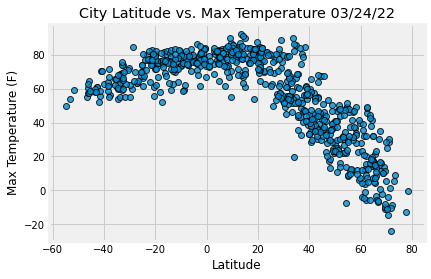

In [51]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png", transparent= False, bbox_inches='tight')

# Show plot.
plt.show()

## Latitude vs. Humidity

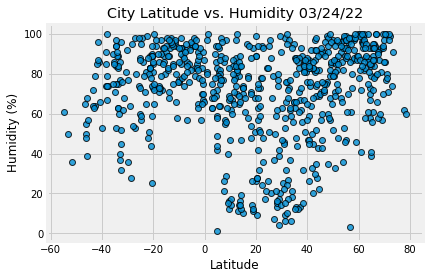

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png", transparent= False, bbox_inches='tight')

# Show plot.
plt.show()

## Latitude vs. Cloudiness 

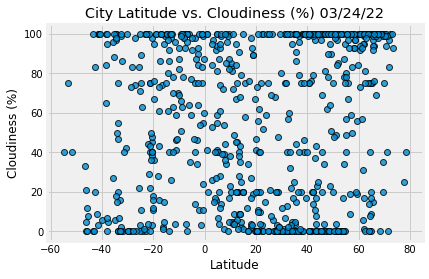

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png", transparent= False, bbox_inches='tight')

# Show plot.
plt.show()

## Latitude vs. Windspeed 

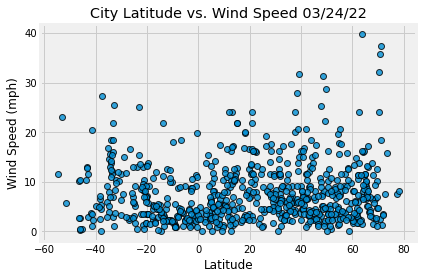

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure.
plt.savefig("weather_data/Fig4.png", transparent= False, bbox_inches='tight')

# Show plot.
plt.show()

# Regression Analysis of Variables with Latitudes

## Define Linear Regression Function

In [55]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, rtext_coordinates, figno):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Get the R-squared value and the other values 
    r2 = (f"R-sqrd = {round((r_value**2), 2)}")
    r = round(r_value, 2)
    # p = round(p_value,5)
    ste = round(std_err, 2)
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r2, rtext_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    # Save the figure.
    plt.savefig(f"weather_data/Fig{figno}.png", transparent= False, bbox_inches='tight')
    
    # Show fig 
    plt.show()
    
    # Display the R, p and standard error 
    print(f"R={r}\n"
    f"p={p_value}\n"
    f"standard error={ste}")

## Divide Data by Hemispheres (Northern: lat>=0) and (Southern: lat<0)

In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
print(f"Northern Hemisphere has {len(northern_hemi_df)} cities.")
print(f"Southern Hemisphere has {len(southern_hemi_df)} cities.")

Northern Hemisphere has 492 cities.
Southern Hemisphere has 214 cities.


## Max Temperature 

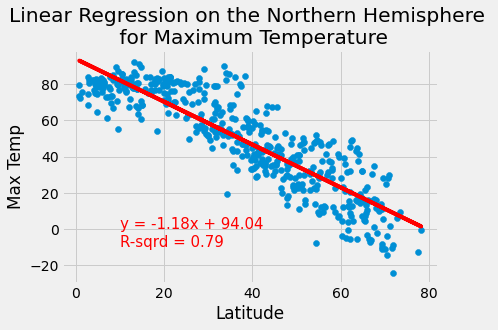

R=-0.89
p=9.841620833252431e-166
standard error=0.03


In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (10,0),
                       (10,-10),
                       5)

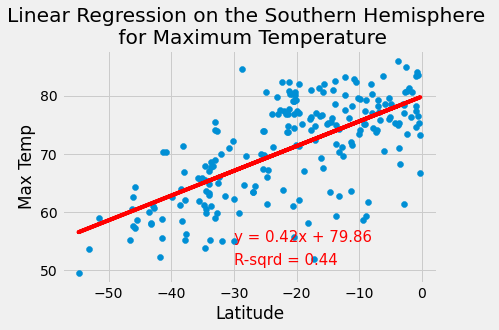

R=0.66
p=1.4943803665307995e-28
standard error=0.03


In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,55), (-30,51), 6)

## Humidity 

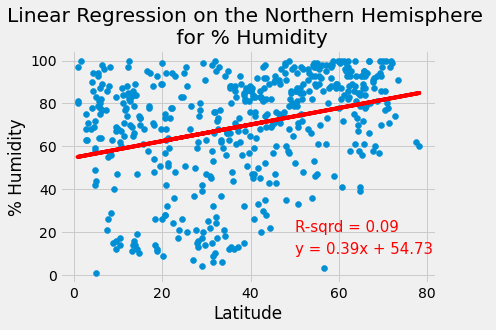

R=0.31
p=3.5315894971977468e-12
standard error=0.05


In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(50,10),(50,20), 7)

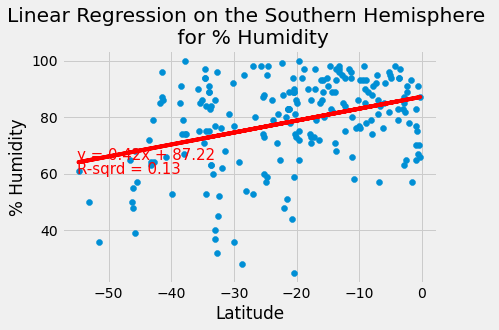

R=0.35
p=1.0645441415345897e-07
standard error=0.08


In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55, 65), (-55,60), 8)

## Cloudiness 

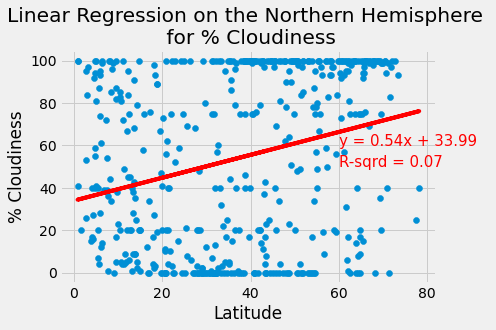

R=0.27
p=1.292403566641923e-09
standard error=0.09


In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(60,60),(60,50), 9)

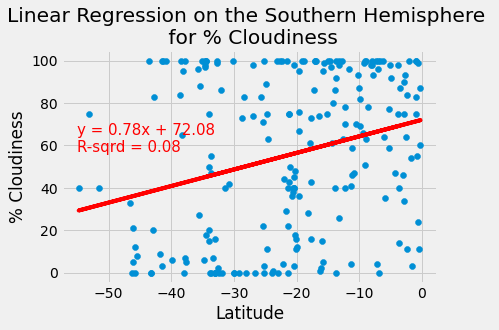

R=0.27
p=4.626804115105817e-05
standard error=0.19


In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55, 65), (-55,57), 10)

## Windspeed

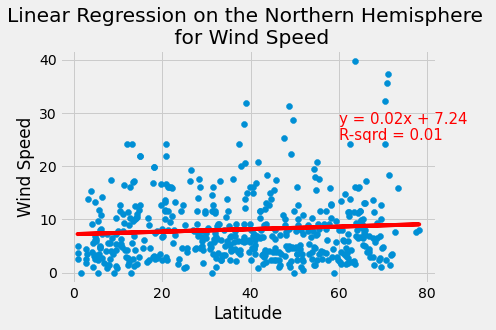

R=0.08
p=0.08444957792479252
standard error=0.01


In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(60,28), (60,25), 11)

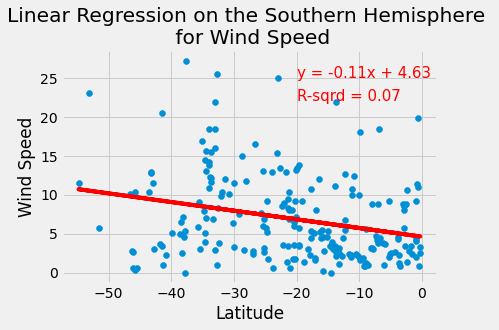

R=-0.27
p=7.011665251376773e-05
standard error=0.03


In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-20,25), (-20,22), 12)